In [1]:
import torch
from torch import nn

torch.__version__

'1.13.1+cu116'

In [2]:
#let's create some data by making circles
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 1000 , noise = 0.003, random_state= 42)

In [3]:
X,y

(array([[ 0.77049941,  0.21095396],
        [-0.78602977,  0.13242465],
        [-0.79586178,  0.10756813],
        ...,
        [-0.14860458, -0.788248  ],
        [ 0.68312855, -0.73282192],
        [ 0.284623  ,  0.95905205]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [4]:
#visualizing the data
import pandas as pd

df = pd.DataFrame({"X1" : X[: , 0] , 
                   "X2" : X[: , 1],
                   "labels" : y[:]})


In [5]:
df.head(10)

,X1,X2,labels
0,0.770499,0.210954,1
1,-0.786030,0.132425,1
2,-0.795862,0.107568,1
3,-0.345934,0.720764,1
4,0.437625,-0.899137,0
5,-0.492824,0.633771,1
6,-0.010412,0.800278,1
7,0.787565,0.131875,1
8,-0.160723,-0.784841,1
9,-0.136160,0.993566,0


In [6]:
df["labels"].value_counts()

1    500
0    500
Name: labels, dtype: int64

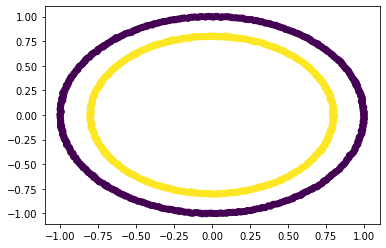

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x = df["X1"],
            y = df["X2"] ,
            c = df["labels"])

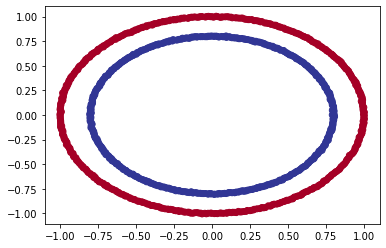

In [8]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu)

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.77049941 0.21095396] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [10]:
#turning numpy into tensors for the purpose of our PyTorch model
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train,y_test = train_test_split(X , y, test_size = 0.2,
                                                    random_state = 42)

In [12]:
X_train.shape,y_train.shape, X_test.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [13]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [14]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2 , out_features = 5)
    self.layer_2 = nn.Linear(in_features = 5 , out_features = 1)
  
  def forward(self , x):
    return self.layer_2(self.layer_1(x))

In [15]:
model_0 = CircleModel()
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
untrained_pred = model_0(X_test)
print(untrained_pred.shape)
print(untrained_pred[:10])
print(y_test[:10])

torch.Size([200, 1])
tensor([[-0.1086],
        [-0.0837],
        [-0.0478],
        [-0.1264],
        [ 0.1889],
        [ 0.2026],
        [ 0.1140],
        [ 0.1842],
        [-0.0668],
        [-0.0658]], grad_fn=<SliceBackward0>)
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [17]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [18]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [19]:
y_logits = model_0(X_train[:5])
y_logits.squeeze()

tensor([ 0.2021,  0.2370, -0.1139, -0.1022, -0.0808],
       grad_fn=<SqueezeBackward0>)

In [20]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5504],
        [0.5590],
        [0.4716],
        [0.4745],
        [0.4798]], grad_fn=<SigmoidBackward0>)

In [21]:
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[1.],
        [1.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)

In [22]:
torch.eq(y_preds.squeeze() , y_train[:5].squeeze())

tensor([ True, False,  True,  True, False])

In [23]:
epochs = 100
for epoch in range(epochs):
  y_logit = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logit , y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

  model_0.eval()
  with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_0(X_test).squeeze() 
      test_pred = torch.round(torch.sigmoid(test_logits))
      # 2. Caculate loss/accuracy
      test_loss = loss_fn(test_logits,
                          y_test)
      test_acc = accuracy_fn(y_true=y_test,
                              y_pred=test_pred)

  # Print out what's happening every 10 epochs
  if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69569, Accuracy: 40000.00% | Test loss: 0.69469, Test acc: 53.50%
Epoch: 10 | Loss: 0.69481, Accuracy: 40000.00% | Test loss: 0.69462, Test acc: 51.00%
Epoch: 20 | Loss: 0.69436, Accuracy: 40000.00% | Test loss: 0.69467, Test acc: 49.50%
Epoch: 30 | Loss: 0.69407, Accuracy: 40000.00% | Test loss: 0.69473, Test acc: 51.00%
Epoch: 40 | Loss: 0.69386, Accuracy: 40000.00% | Test loss: 0.69477, Test acc: 49.00%
Epoch: 50 | Loss: 0.69371, Accuracy: 40000.00% | Test loss: 0.69480, Test acc: 49.50%
Epoch: 60 | Loss: 0.69358, Accuracy: 40000.00% | Test loss: 0.69481, Test acc: 49.50%
Epoch: 70 | Loss: 0.69348, Accuracy: 40000.00% | Test loss: 0.69483, Test acc: 49.50%
Epoch: 80 | Loss: 0.69339, Accuracy: 40000.00% | Test loss: 0.69484, Test acc: 51.00%
Epoch: 90 | Loss: 0.69333, Accuracy: 40000.00% | Test loss: 0.69484, Test acc: 49.50%


In [24]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

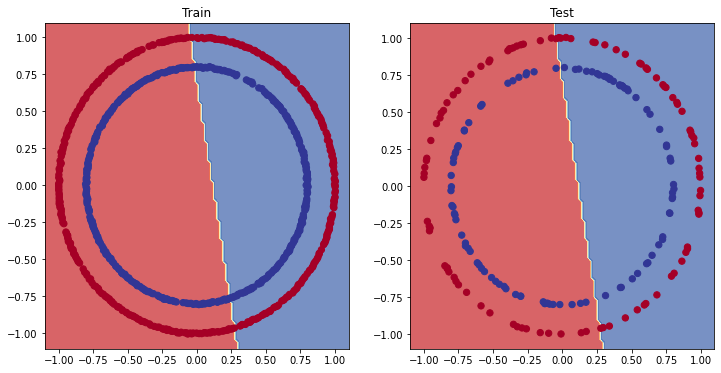

In [25]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [26]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [27]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [28]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69554, Accuracy: 50.00% | Test loss: 0.69157, Test acc: 52.50%
Epoch: 100 | Loss: 0.69338, Accuracy: 49.88% | Test loss: 0.69351, Test acc: 50.50%
Epoch: 200 | Loss: 0.69307, Accuracy: 50.62% | Test loss: 0.69418, Test acc: 48.50%
Epoch: 300 | Loss: 0.69300, Accuracy: 50.88% | Test loss: 0.69444, Test acc: 47.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69457, Test acc: 45.50%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69463, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69468, Test acc: 46.50%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69469, Test acc: 45.50%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.25% | Test loss: 0.69469, Test acc: 45.50%


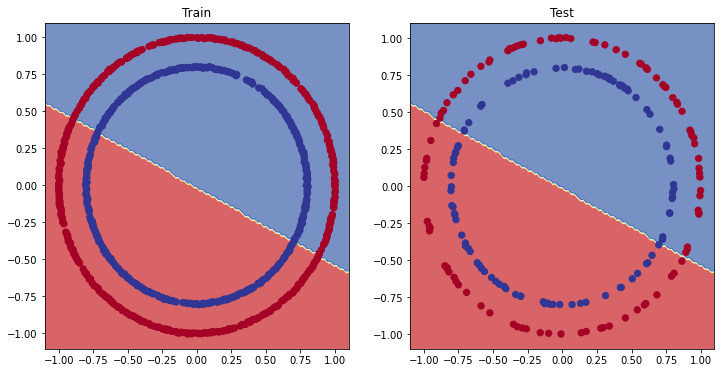

In [29]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [30]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [31]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

80 80 20 20


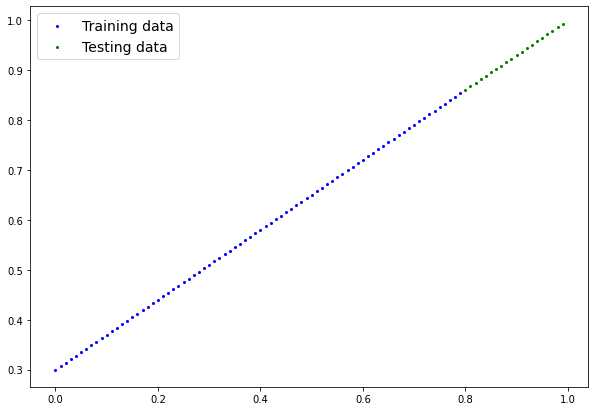

In [32]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [33]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [35]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training 
    # 1. Forward pass
    y_pred = model_2(X_train_regression)
    
    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss 
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05600, Test loss: 0.01425
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


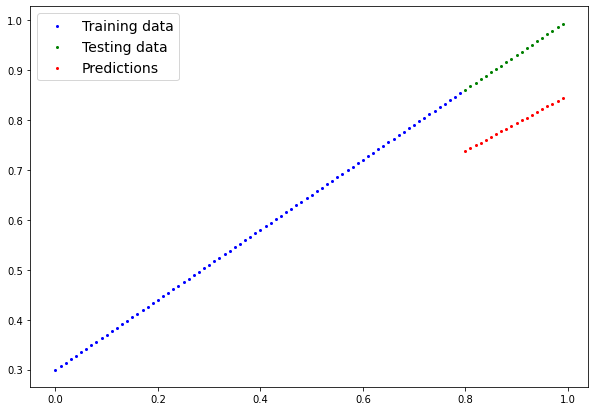

In [36]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

we tried the adding of the epochs and more layers as a hyperparameter tuning but in vain.
we tried to learn the linear data by the model and it learned pretty well so lets add non linearity layer (relu or sigmoid) to the forward computation

In [37]:
#creating the data 
n_samples = 1000
import torch
from sklearn.datasets import make_circles

X,y = make_circles(n_samples = n_samples , noise = 0.03 , 
                   random_state = 42)

In [38]:
X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]), array([1, 1, 1, 1, 0]))

In [39]:
#converting into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [40]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [42]:
#making the architecture of the model
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2 , out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10 , out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu((self.layer_1(x))))))

In [43]:
model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [44]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.4)

In [45]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69299, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.68522, Accuracy: 52.62% | Test Loss: 0.68405, Test Accuracy: 56.50%
Epoch: 200 | Loss: 0.65224, Accuracy: 63.88% | Test Loss: 0.64762, Test Accuracy: 67.50%
Epoch: 300 | Loss: 0.52034, Accuracy: 65.50% | Test Loss: 0.81035, Test Accuracy: 50.00%
Epoch: 400 | Loss: 0.41187, Accuracy: 71.50% | Test Loss: 0.48717, Test Accuracy: 69.50%
Epoch: 500 | Loss: 0.07001, Accuracy: 99.88% | Test Loss: 0.09980, Test Accuracy: 99.00%
Epoch: 600 | Loss: 0.03280, Accuracy: 100.00% | Test Loss: 0.05431, Test Accuracy: 99.00%
Epoch: 700 | Loss: 0.02114, Accuracy: 100.00% | Test Loss: 0.03941, Test Accuracy: 99.00%
Epoch: 800 | Loss: 0.01575, Accuracy: 100.00% | Test Loss: 0.03230, Test Accuracy: 99.00%
Epoch: 900 | Loss: 0.01253, Accuracy: 100.00% | Test Loss: 0.02799, Test Accuracy: 99.00%


In [46]:
# Make predictions
model_1.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_1(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

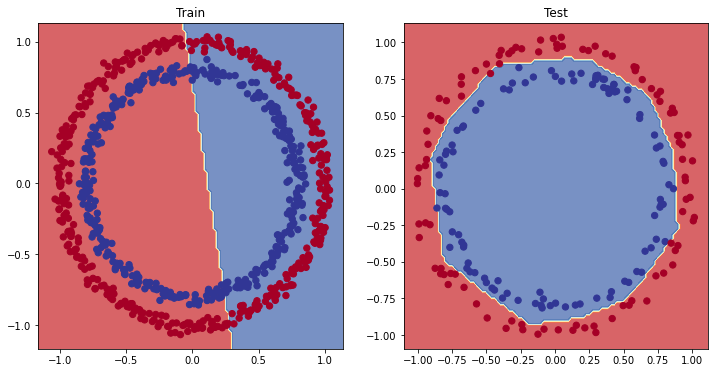

In [47]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test) # model_3 = has non-linearity

NON LINEARITY

In [49]:
A = torch.arange(-10 , 10 , 1, dtype = torch.float)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

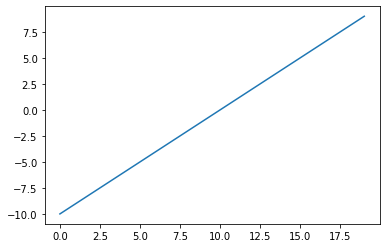

In [50]:
plt.plot(A)

In [65]:
def ReLU(x):
  return torch.maximum(torch.tensor(0) , x)

relu_tensor = ReLU(A)

In [66]:
relu_tensor

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

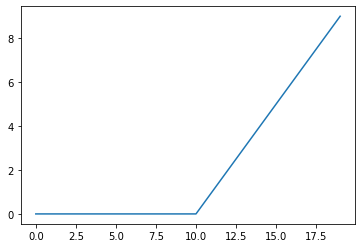

In [67]:
plt.plot(relu_tensor)

In [71]:
def sigmoid(x):
  return 1/(1 + torch.exp(-x))

sigmoid_tensor = sigmoid(A)

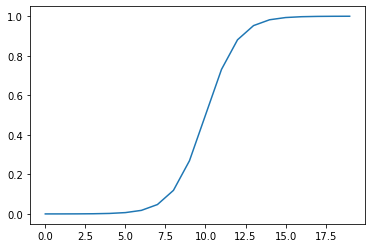

In [72]:
plt.plot(sigmoid_tensor)

In [82]:
import torch
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blobs, y_blobs = make_blobs(n_samples = 1000, n_features = NUM_FEATURES ,random_state = RANDOM_SEED , centers = NUM_CLASSES, cluster_std =1.5)

X_blobs[:10], y_blobs[:10]

#converting to tensors
X_blobs = torch.from_numpy(X_blobs).type(torch.float)
y_blobs = torch.from_numpy(y_blobs).type(torch.LongTensor)

X_blobs_train , X_blobs_test , y_blobs_train, y_blobs_test = train_test_split(X_blobs , y_blobs , test_size = 0.2 , random_state = 42)

len(X_blobs_train) , len(y_blobs_train) , len(X_blobs_test) , len(y_blobs_test)


(800, 800, 200, 200)

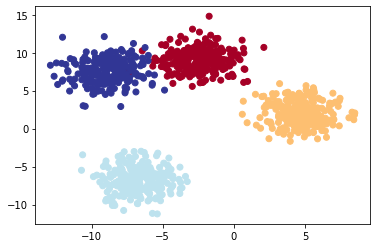

In [83]:
#visualize , visulaize, visulaize!!!!

plt.scatter(X_blobs[:,0] , X_blobs[:,1] ,c= y ,  cmap=plt.cm.RdYlBu)

In [107]:
#making the architecture of the models , this time using sequential

class MultiModel(nn.Module):
  def __init__(self , in_features , out_features , hidden_units):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = in_features , out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units , out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units , out_features = out_features),
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

model_epic = MultiModel(in_features= NUM_FEATURES , out_features = NUM_CLASSES , hidden_units = 10)
model_epic

MultiModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [108]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_epic.parameters() , lr = 0.3)

In [93]:
#raw ouptus = logits
#prediction probabilities
#predictions - rounnding or argmax

In [96]:
y_logits = model_epic(X_blobs_train)
y_logits[:5]

tensor([[ 0.7165,  0.7209,  0.9174, -0.7005],
        [ 2.0244,  2.1531, -0.0336, -0.1987],
        [-2.3743, -1.7827, -2.7729,  0.5697],
        [-1.2661, -0.8193, -1.8932,  0.2977],
        [ 1.4778,  1.6635, -0.3706, -0.1047]], grad_fn=<SliceBackward0>)

In [99]:
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs

tensor([[0.2882, 0.2895, 0.3524, 0.0699],
        [0.4213, 0.4792, 0.0538, 0.0456],
        [0.0445, 0.0804, 0.0299, 0.8452],
        ...,
        [0.4272, 0.4716, 0.0615, 0.0398],
        [0.0751, 0.1252, 0.0514, 0.7483],
        [0.3065, 0.4542, 0.0262, 0.2131]], grad_fn=<SoftmaxBackward0>)

In [103]:
y_preds = torch.argmax(y_pred_probs , dim =1)
y_preds[:5]

tensor([2, 1, 3, 3, 1])

In [109]:
torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):
    model_epic.train()

    
    y_logits = model_epic(X_blobs_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blobs_train) 
    acc = accuracy_fn(y_true=y_blobs_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_epic.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_epic(X_blobs_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blobs_test)
      test_acc = accuracy_fn(y_true=y_blobs_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.50867, Acc: 2.75% | Test Loss: 1.37949, Test Acc: 10.00%
Epoch: 10 | Loss: 0.81671, Acc: 75.88% | Test Loss: 2.23740, Test Acc: 71.00%
Epoch: 20 | Loss: 0.12078, Acc: 99.00% | Test Loss: 0.08704, Test Acc: 99.50%
Epoch: 30 | Loss: 0.04077, Acc: 99.12% | Test Loss: 0.03094, Test Acc: 99.50%
Epoch: 40 | Loss: 0.03351, Acc: 99.12% | Test Loss: 0.02371, Test Acc: 99.50%
Epoch: 50 | Loss: 0.03066, Acc: 99.12% | Test Loss: 0.02070, Test Acc: 99.50%
Epoch: 60 | Loss: 0.02905, Acc: 99.12% | Test Loss: 0.01900, Test Acc: 99.50%
Epoch: 70 | Loss: 0.02798, Acc: 99.12% | Test Loss: 0.01788, Test Acc: 99.50%
Epoch: 80 | Loss: 0.02720, Acc: 99.12% | Test Loss: 0.01709, Test Acc: 99.50%
Epoch: 90 | Loss: 0.02660, Acc: 99.12% | Test Loss: 0.01647, Test Acc: 99.50%


In [114]:
# Make predictions
model_epic.eval()
with torch.inference_mode():
  y_logits = model_epic(X_blobs_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ 3.4567, 12.9040, -0.7648, -7.1082],
        [ 2.0231, -4.9433, -0.6537,  7.2040],
        [-3.8951, -2.1967,  6.1434, -2.0976],
        [ 0.1884,  8.5975,  0.3113, -4.5624],
        [11.8016,  4.1901, -4.6804, -1.3343],
        [ 2.1048, -5.9203, -0.7658,  8.6000],
        [-3.5592, -2.0084,  5.4599, -1.8431],
        [10.0213,  0.3542, -4.0137,  1.5225],
        [-4.8741, -3.2979,  7.5204, -2.1827],
        [10.5741,  1.5974, -4.1987,  0.4905]])

In [115]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blobs_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blobs_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


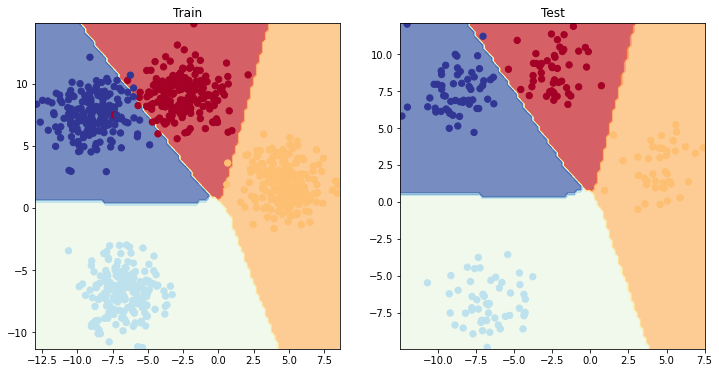

In [119]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_epic, X_blobs_train, y_blobs_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_epic, X_blobs_test, y_blobs_test)

In [117]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 KB 10.5 MB/s eta 0:00:00


NameError: ignored